### 회귀모형 평가

1. 'E'rror 계열 -> 작을수록 좋다.
2. R2 계열 -> 클수록 좋다. '상대적' 지표이다. -> 모델 비교시에 사용

In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [4]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

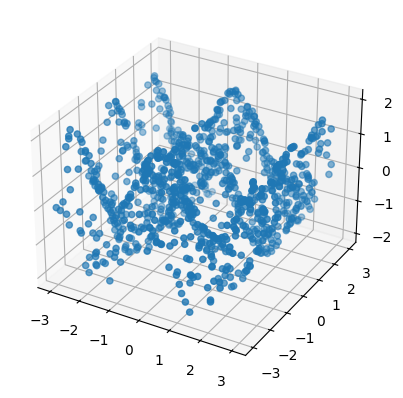

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)

])

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt, loss='mse')

r = model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 1.0556 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.9677
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.9791
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.9776
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.8796
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.9232
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.8284
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.7742
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.6631
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.6402
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.6810
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.5616
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.5434
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.5365
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

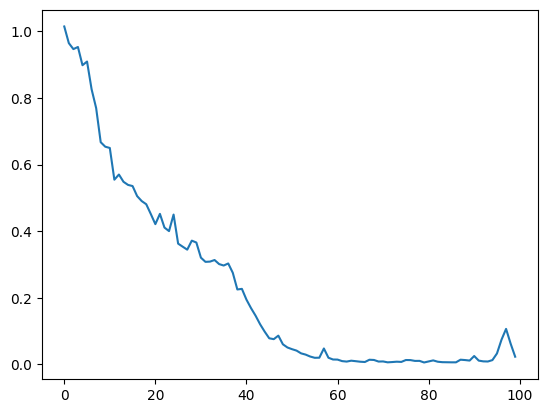

In [8]:
plt.plot(r.history['loss'], label = 'loss')

In [9]:
# MSE
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)

mse = mean_squared_error(Y, y_pred)
print('Mean Squared Error: ',mse)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error:  0.006615276500531898


In [10]:
# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.06505114704199358


In [11]:
# R2
from sklearn.metrics import r2_score

r2 = r2_score(Y, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.9932688969819636


In [12]:
X.shape

(1000, 2)

In [13]:
# R2 adj
n = X.shape[0] # 샘플 수
p = X.shape[1] - 1 # 설명변수 - 1
r2 = r2_score(Y, y_pred)

adj_r2 = 1-(1-r2) * ((n-1)/(n-p-1))
print("Adjusted R2 Score: ", adj_r2)

Adjusted R2 Score:  0.9932621523897612


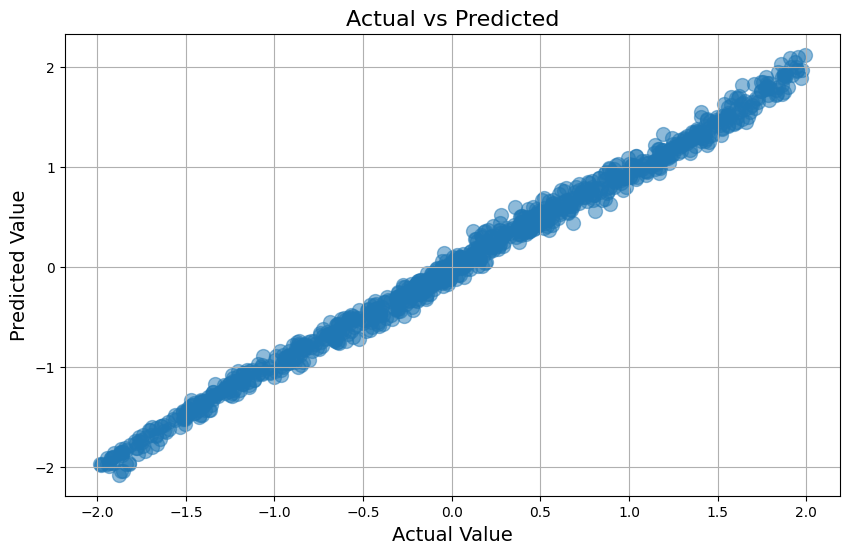

In [14]:
plt.figure(figsize= (10, 6))
plt.scatter(Y, y_pred, alpha=0.5, s=100)
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.title('Actual vs Predicted', fontsize=16)
plt.grid(True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


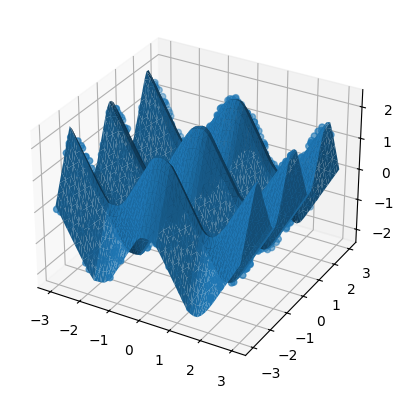

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy, = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten() # hat은 예측값 의미
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

### step 5. extrapolation (외삽법)
##### 학습한 회귀모델을 활용해 아직 데이터가 없는 부분에 대한 예측 시행
- 현재 데이터 범위를 넘어선 미래의 예측
    - 추세 이해

- 데이터 결측치 채우기

Risk: 
- 예측: 현재의 추세가 미래에 계속된다는 가정
- 데이터 결측치 채우기: bias가 발생할 수 있음

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


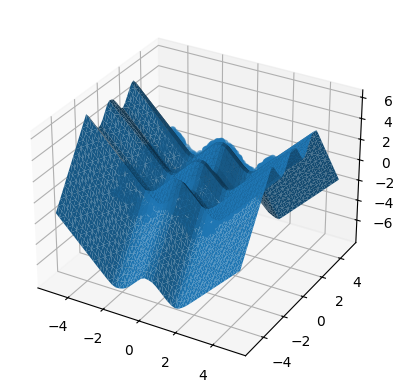

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# X[0], X[1] 특성변수의 범위를 확장
line = np.linspace(-5, 5, 50) # 앞 코드와 달라진 부분
xx, yy, = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# 확장된 특성변수에 대한 예측
Yhat = model.predict(Xgrid).flatten() # 이번 Yhat은 저번 Yhat랑 다름
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()